### Wstęp do Uczenia Maszynowego 
##### Laboratorium 4

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Zadanie 6
-----
Weźmy pod uwagę dane `earthquake.csv`, które dotyczą klasyfikacji wstrząsów (zmienna *popn*). Zmienne objaśniające to zmienne *body* i *surface* (zmienne sejsmologiczne).

a) Wykonaj wykres dla zmiennych *body* i *surface* z zaznaczeniem przynależności do klas.

b) Dopasuj modej regresji logistycznej. 

c) Interpretacja współczynników.

In [73]:
earthquake = pd.read_csv("earthquake.txt", sep=" ")

In [74]:
earthquake["color"] = np.where(earthquake["popn"] == "equake", "red", "blue")

<Axes: xlabel='body', ylabel='surface'>

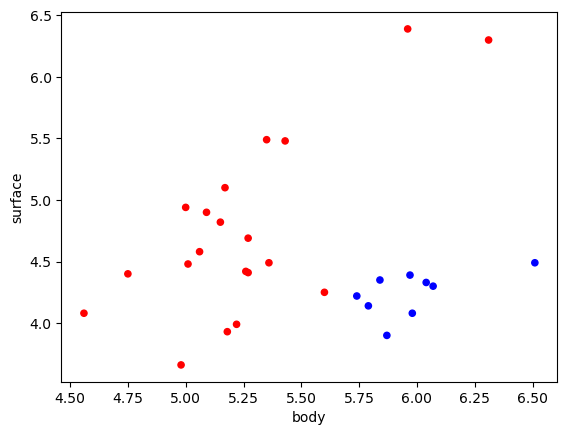

In [75]:
earthquake.plot.scatter(x = "body", y = "surface", c = "color") 


In [77]:
y = earthquake.popn == "equake"
X = earthquake.drop(["popn", "color"], axis=1)

In [79]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(penalty=None)
lm.fit(X,y)

LogisticRegression(penalty=None)

In [80]:
lm.coef_

array([[-146.40894937,  151.81204304]])

In [81]:
lm.intercept_

array([184.8930899])

##### Laboratorium 5

### Zadanie 1
-----
Wczytaj dane `pima.csv`.

a) Podziel dane za część treningową i testową (3:2).

b) Dopasuj model drzewa do danych treningowych.

c) Dopasuj model regresji logistycznej do danych treningowych.

d) Podaj miary: czułość, precyzja, AUC dla obu modeli.

e) Narysuj krzywą ROC dla obu modeli.

In [82]:
df = pd.read_csv('pima.csv')

In [83]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
from sklearn.model_selection import train_test_split
y = df.Outcome
X = df.drop(['Outcome'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [85]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(penalty=None, max_iter=1000)
lm.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty=None)

In [87]:
from sklearn.metrics import precision_score, roc_auc_score, recall_score, roc_curve
y_pred_tree = tree.predict(X_test)
y_pred_lm = lm.predict(X_test)

In [89]:
print("precision score tree:", np.round(precision_score(y_test, y_pred_tree), 3))
print("precision score lm:", np.round(precision_score(y_test, y_pred_lm), 3))
print("recall score tree:", np.round(recall_score(y_test, y_pred_tree), 3))
print("recall score lm:", np.round(recall_score(y_test, y_pred_lm), 3))


precision score tree: 0.541
precision score lm: 0.773
recall score tree: 0.527
recall score lm: 0.518


In [95]:
pred_tree = tree.predict_proba(X_test)
pred_lm = lm.predict_proba(X_test)


In [99]:
print("auc tree:", np.round(roc_auc_score(y_test, pred_tree[:,1]), 3))
print("auc lm:", np.round(roc_auc_score(y_test, pred_lm[:,1]), 3))

auc tree: 0.636
auc lm: 0.841


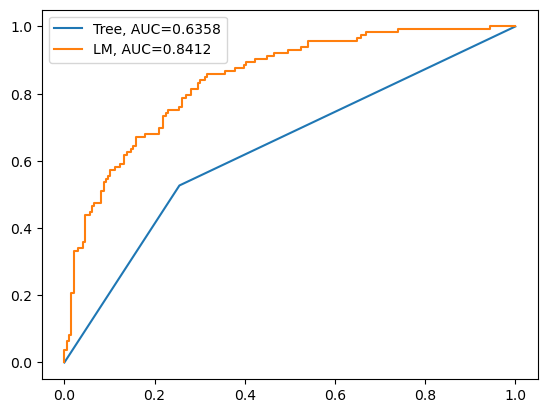

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, pred_tree[:,1])
plt.plot(fpr,tpr,label="Tree, AUC="+str(round(roc_auc_score(y_test, pred_tree[:,1]), 4)))
fpr, tpr, thresholds = roc_curve(y_test, pred_lm[:,1])
plt.plot(fpr,tpr,label="LM, AUC="+str(round(roc_auc_score(y_test, pred_lm[:,1]), 4)))
plt.legend()

### Zadanie 2
-----
Eksperyment symulacyjny. Wygenerujmy dane w następujący sposób. Niech $n = 200$, $p = 5$. Wektor $\beta_0 = 1$, $\beta_1 = [2, 1, 0.5, 0.01, 0]$, $x_i \sim N_p(0, I)$ dla $i = 1,2, \dots, n$. $y_i$ pochodzi z rozkładu $Bern(p_i)$, gdzie $p_i=\frac{exp(\beta_0 + x_{i\cdot}\beta_1)}{1 + exp(\beta_0 + x_{i\cdot}\beta_1)}$.

a) Dopasuj model regresji logistycznej. Porównaj prawdziwe wartości wektora $\beta$ z wyestymowanymi.

b) Dopasuj model regresji logistycznej z regularyzacją $L2$ i współczynnikami $C = (10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005). jak zmienieją się współczynniki wraz ze wzrostem współczynnika lambda?

c) Dopasuj model regresji logistycznej z regularyzacją $L1$ i współczynnikami $C = (10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005). jak zmienieją się współczynniki wraz ze wzrostem współczynnika lambda?

d) Powtórz eksperyment 500 razy dla modelu logistycznego bez regularyzacji, z regularyzacją $L2$ i parametrem $C=1$ i regularyzacją $L1$ i parametrem $C=1$. Oblicz MSE.

In [101]:
n = 200
p = 5
beta_0 = 1
beta_1 = np.array([2, 1, 0.5, 0.01, 0])
X = np.random.normal(0, 1, size = (n, p))
Xbeta = X@beta_1+beta_0
probs = np.exp(Xbeta)/(1+np.exp(Xbeta)) 
y = np.random.binomial(1, probs) 

In [102]:
# a)

lm = LogisticRegression(penalty = None)
lm.fit(X,y)
print(lm.coef_)
print(lm.intercept_)

[[ 2.04707646  0.68118439  0.50475138 -0.21648242 -0.53860322]]
[1.09148878]
